# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

2009'dan 2019'a kadar Amazon'un En Çok Satan 50 kitabına ilişkin veri kümesi. 550 kitap içerir, veriler Goodreads kullanılarak kurgu ve kurgu olmayan olarak kategorize edilmiştir.

In [2]:
amazon = pd.read_csv("bestsellers with categories.csv")
data = amazon.copy()

In [3]:
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [5]:
data.shape

(550, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
sns.set_style("darkgrid")

# Visualization

### Kaç tür var

In [8]:
genre_count = data.groupby("Genre")["Name"].count() # Kaç tür var
genre_count

Genre
Fiction        240
Non Fiction    310
Name: Name, dtype: int64

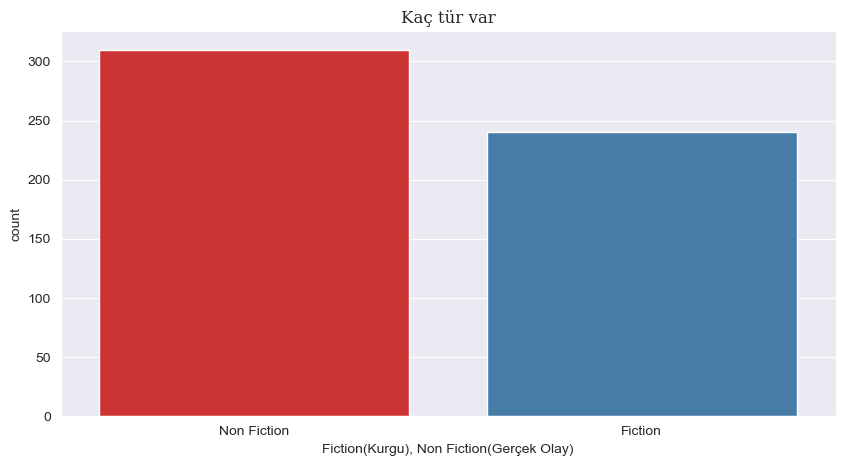

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x = "Genre", data = data, palette = "Set1")
plt.title("Kaç tür var", fontfamily = "serif", size = 12)
plt.xlabel("Fiction(Kurgu), Non Fiction(Gerçek Olay)")
plt.show()

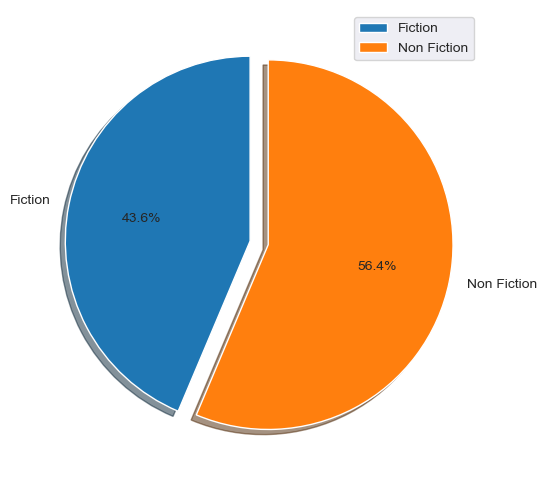

In [24]:
plt.figure(figsize = (8,6))
plt.pie(genre_count.values, labels = genre_count.index, autopct = "%1.1f%%",
        explode = [0,0.1], startangle = 90, shadow = True)
plt.legend()
plt.show()

### En fazla kitap yayınlayan yazarlar

In [11]:
author_count = data.groupby("Author")["Name"].count().sort_values(ascending = False)[0:10]
author_count

Author
Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Eric Carle                             7
Bill O'Reilly                          7
Name: Name, dtype: int64

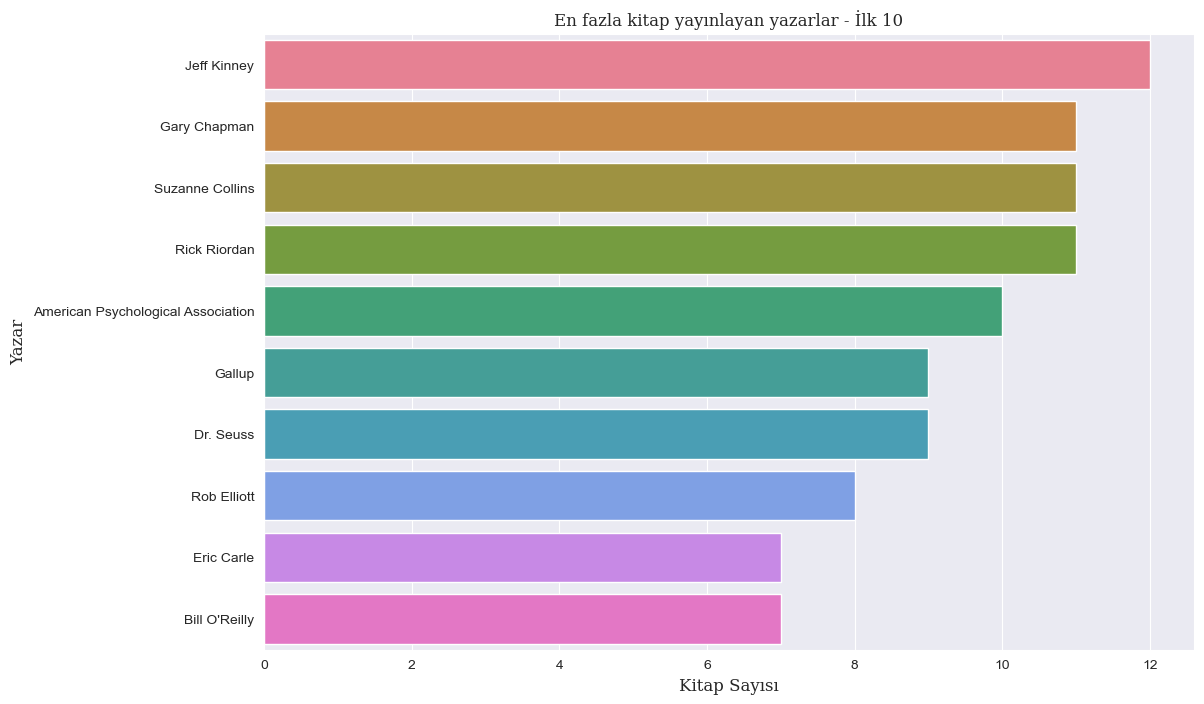

In [12]:
plt.figure(figsize = (12,8))
sns.barplot(x = author_count.values, y = author_count.index, palette="husl")
plt.title("En fazla kitap yayınlayan yazarlar - İlk 10", fontfamily = "serif", size = 12)
plt.ylabel("Yazar", fontfamily = "serif", size = 12)
plt.xlabel("Kitap Sayısı", fontfamily = "serif", size = 12)
plt.show()

### En başarılı 10 yazar

In [13]:
most_author = data.groupby("Author")["Reviews"].sum().sort_values(ascending = False)[0:10]
most_author

Author
Suzanne Collins      278329
John Green           210419
E L James            178011
Dr. Seuss            176545
Gillian Flynn        171813
Paula Hawkins        158892
Laura Hillenbrand    148365
Harper Lee           146152
Gary Chapman         145958
Don Miguel Ruiz      139848
Name: Reviews, dtype: int64

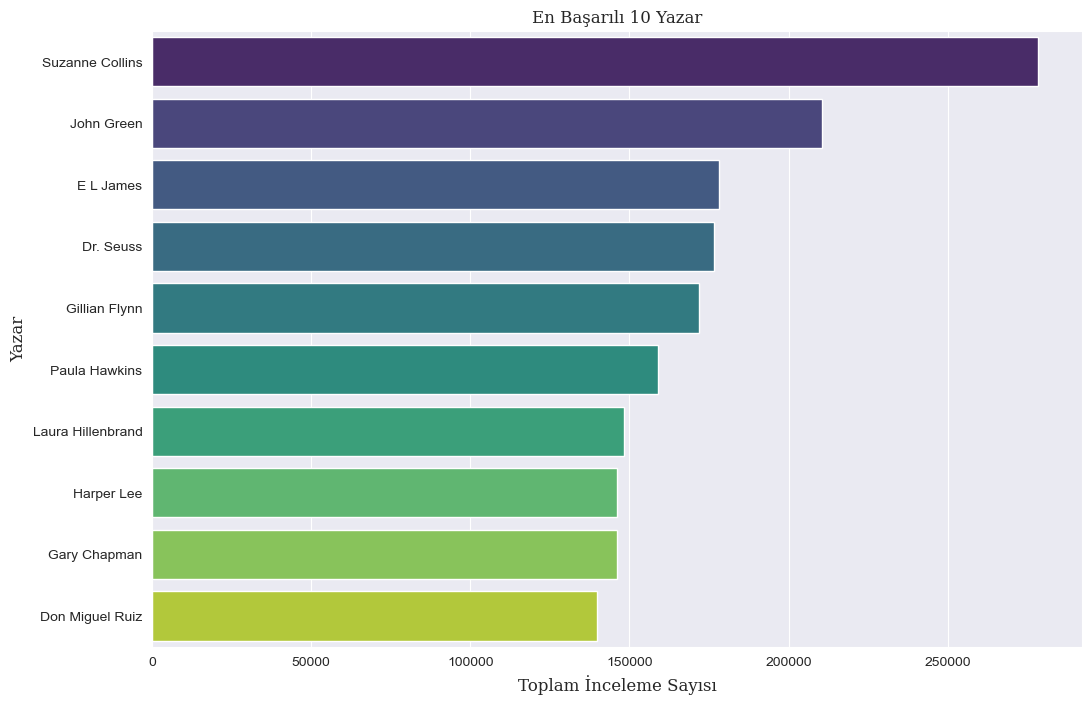

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(x = most_author.values, y = most_author.index, palette="viridis")
plt.xlabel("Toplam İnceleme Sayısı", fontfamily = "serif", size = 12)
plt.ylabel("Yazar", fontfamily = "serif", size = 12)
plt.title("En Başarılı 10 Yazar", fontfamily = "serif", size = 12)
plt.show()

### Kullanıcı Derecelendirmesine Göre Tıklanma Sayısı

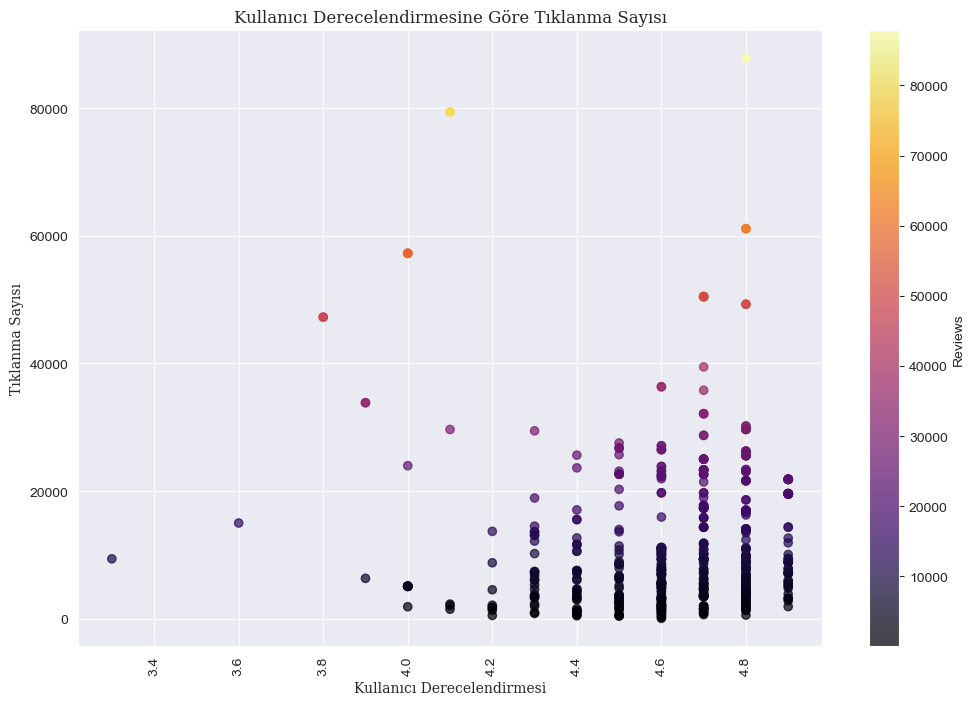

In [15]:
f, ax = plt.subplots(figsize = (12,8))
plt.scatter(x = data["User Rating"], y = data["Reviews"],
            c = data["Reviews"], cmap = "inferno", alpha = 0.7)
plt.xticks(rotation = 90)
plt.xlabel('Kullanıcı Derecelendirmesi', fontfamily = "serif")
plt.ylabel('Tıklanma Sayısı', fontfamily = "serif")
plt.title('Kullanıcı Derecelendirmesine Göre Tıklanma Sayısı', fontfamily = "serif")
plt.colorbar(label='Reviews')
plt.show()

### Fiyat ve Kullanıcı Derecelendirmesi İlişkisi

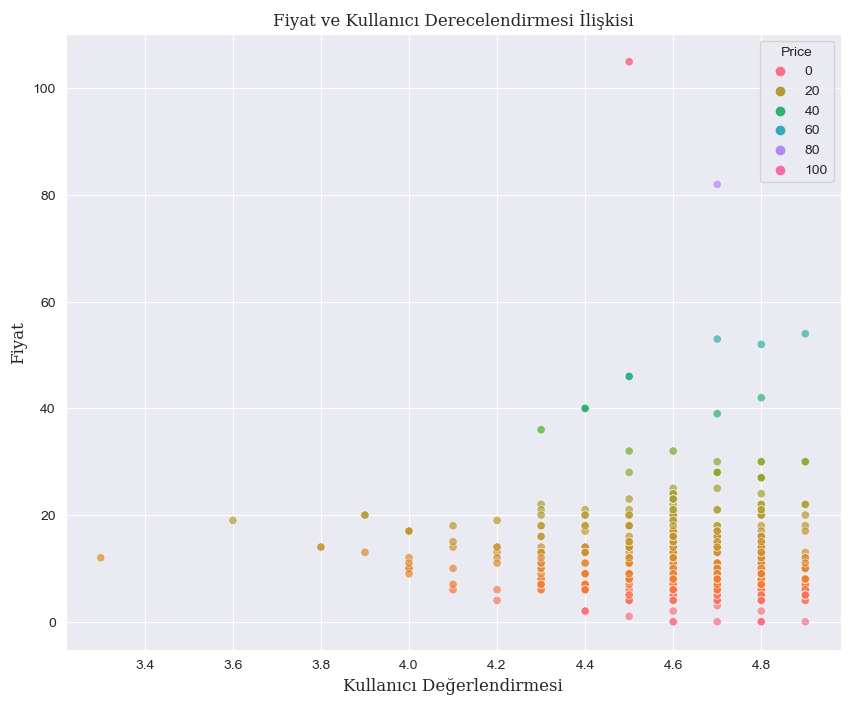

In [16]:
f, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = data["User Rating"], y = data["Price"], data = data, 
                alpha = 0.7, hue = data["Price"], palette="husl")
plt.xlabel('Kullanıcı Değerlendirmesi', fontfamily = "serif", size = 12)
plt.ylabel('Fiyat', fontfamily = "serif", size = 12)
plt.title('Fiyat ve Kullanıcı Derecelendirmesi İlişkisi', fontfamily = "serif", size = 12)
plt.show()

### Yıllara Göre Kitap Fiyatlarının Ortalaması

In [17]:
yearly_avg_price = data.groupby("Year")["Price"].mean()
yearly_avg_price

Year
2009    15.40
2010    13.48
2011    15.10
2012    15.30
2013    14.60
2014    14.64
2015    10.42
2016    13.18
2017    11.38
2018    10.52
2019    10.08
Name: Price, dtype: float64

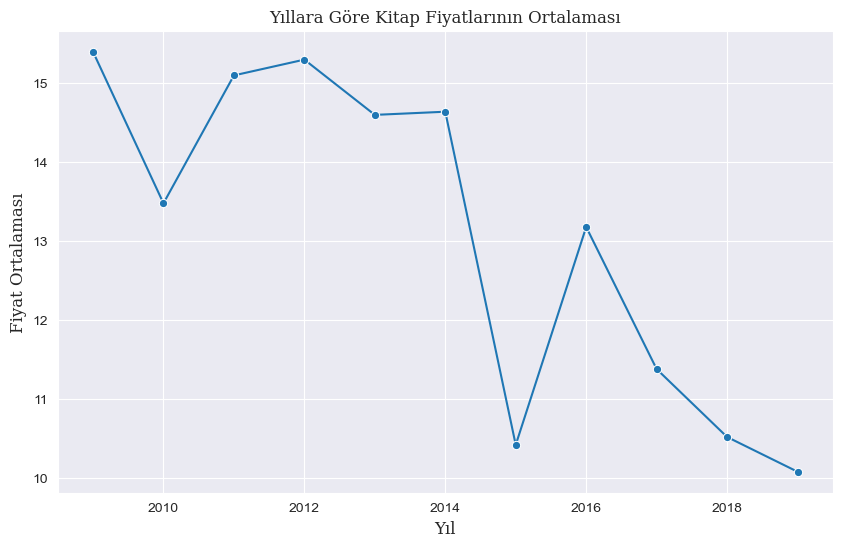

In [18]:
plt.figure(figsize = (10,6))
sns.lineplot(x = yearly_avg_price.index, y = yearly_avg_price.values, marker="o")
plt.title("Yıllara Göre Kitap Fiyatlarının Ortalaması", fontfamily = "serif", size = 12)
plt.xlabel("Yıl", fontfamily = "serif", size = 12)
plt.ylabel("Fiyat Ortalaması", fontfamily = "serif", size = 12)
plt.show()